# Econ 3110: Problem Set 11


## Question 1 (15 points)

**Parameters:**
*   Two consumers, $i \in \{1, 2\}$.
*   One good (potatoes), no storage.
*   Endowments:
    *   $w^1 = (2, 0, 2, 0, \dots)$
    *   $w^2 = (0, 2, 0, 2, \dots)$
*   Total endowment: $W_t = 2$ for all $t$.
*   Utility: $U_i = \sum_{t=0}^\infty \beta^t \log(c_t^i)$.
*   $p_0 = 1$.

### (a) Pareto-efficient allocation
A Pareto-efficient allocation is a feasible allocation $((c^1_t)_{t=0}^\infty, (c^2_t)_{t=0}^\infty)$ such that no consumer can be made better off without making the other worse off. 

Given identical homothetic preferences (log utility) and a constant aggregate endowment ($W_t = 2$), the optimal risk-sharing condition implies constant consumption shares. With equal welfare weights, the symmetric Pareto-efficient allocation is:
$$
c_t^1 = c_t^2 = 1 \quad \forall t
$$

### (b) Utility-maximization & FOC
Consumer $i$'s problem:
$$
\max_{\{c_t^i\}} \sum_{t=0}^\infty \beta^t \log(c_t^i) \quad \text{s.t.} \quad \sum_{t=0}^\infty p_t c_t^i \le \sum_{t=0}^\infty p_t w_t^i
$$
Lagrangian:
$$
\mathcal{L} = \sum_{t=0}^\infty \beta^t \log(c_t^i) - \lambda_i \left( \sum_{t=0}^\infty p_t c_t^i - W^i \right)
$$
FOC with respect to $c_t^i$:
$$
\frac{\beta^t}{c_t^i} - \lambda_i p_t = 0 \implies \frac{\beta^t}{c_t^i} = \lambda_i p_t
$$

### (c) Euler Equation
From the FOCs at time $t$ and $t+1$:
1. $\lambda_i = \frac{\beta^t}{p_t c_t^i}$
2. $\lambda_i = \frac{\beta^{t+1}}{p_{t+1} c_{t+1}^i}$

Equating them:
$$
\frac{\beta^t}{p_t c_t^i} = \frac{\beta^{t+1}}{p_{t+1} c_{t+1}^i} \implies \frac{c_{t+1}^i}{c_t^i} = \beta \frac{p_t}{p_{t+1}}
$$
Or equivalently:
$$
c_{t+1}^i = \beta \frac{p_t}{p_{t+1}} c_t^i
$$

### (d) Equilibrium Price
Sum the equation from (c) over $i=1,2$:
$$
\sum_{i=1}^2 c_{t+1}^i = \beta \frac{p_t}{p_{t+1}} \sum_{i=1}^2 c_t^i
$$
Using market clearing $\sum c_t^i = 2$ for all $t$:
$$
2 = \beta \frac{p_t}{p_{t+1}} (2) \implies 1 = \beta \frac{p_t}{p_{t+1}} \implies p_{t+1} = \beta p_t
$$
Given $p_0 = 1$, the equilibrium price is:
$$
p_t = \beta^t
$$

### (e) Consumption Path
Substitute $p_{t+1}/p_t = \beta$ into the equation from (c):
$$
c_{t+1}^i = \beta \left( \frac{1}{\beta} \right) c_t^i = c_t^i
$$
Thus, consumption is constant over time:
$$
c_{t+1}^i = c_0^i \quad \forall t
$$

### (f) Solve for $c_0^1$ and $c_0^2$
Using consumer 1's budget constraint:
$$
\sum_{t=0}^\infty p_t c_t^1 = \sum_{t=0}^\infty p_t w_t^1
$$
LHS (using $c_t^1 = c_0^1$ and $p_t = \beta^t$):
$$
c_0^1 \sum_{t=0}^\infty \beta^t = c_0^1 \frac{1}{1-\beta}
$$
RHS (using $w^1 = (2, 0, 2, 0, \dots)$):
$$
\sum_{t=0}^\infty \beta^t w_t^1 = 2(1) + 0(\beta) + 2(\beta^2) + \dots = 2(1 + \beta^2 + \beta^4 + \dots) = 2 \frac{1}{1-\beta^2}
$$
Equating LHS and RHS:
$$
c_0^1 \frac{1}{1-\beta} = \frac{2}{1-\beta^2} \implies c_0^1 = \frac{2(1-\beta)}{(1-\beta)(1+\beta)} = \frac{2}{1+\beta}
$$
Using market clearing for period 0 ($c_0^1 + c_0^2 = 2$):
$$
c_0^2 = 2 - \frac{2}{1+\beta} = \frac{2(1+\beta) - 2}{1+\beta} = \frac{2\beta}{1+\beta}
$$

### (g) Comments on Saving
**Results:** $c_t^1 = \frac{2}{1+\beta}$ and $c_t^2 = \frac{2\beta}{1+\beta}$ for all $t$.

*   **Even periods ($t=0, 2, ...$):** Person 1 has endowment $w^1_t = 2$. Consumption is $\frac{2}{1+\beta}$. Since $\beta < 1$, $c^1_t < 2$, so Person 1 **saves** ($w > c$). Person 2 has $w=0$, consumes $>0$, so Person 2 **borrows**.
*   **Odd periods ($t=1, 3, ...$):** Person 1 has endowment $w^1_t = 0$. Consumption is $>0$. Person 1 **borrows** (dissaves). Person 2 **saves**.
*   **Price Ratio:** The ratio $\frac{p_{t+1}}{p_t} = \beta$ reflects the **discount factor** (or the inverse of the gross interest rate $1+r = 1/\beta$). It ensures consumers are indifferent between consuming today and tomorrow, leading to perfect consumption smoothing despite fluctuating endowments.

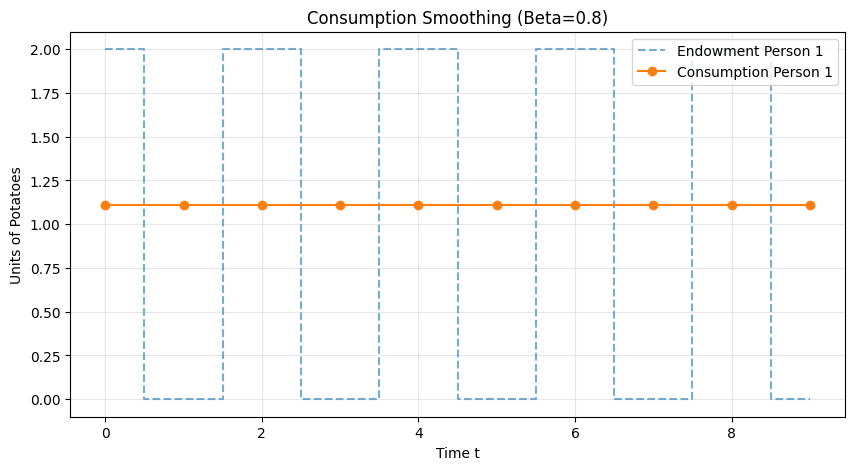

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for visualization
beta = 0.8
periods = 10
t = np.arange(periods)

# Endowments
w1 = np.array([2 if i % 2 == 0 else 0 for i in t])
w2 = 2 - w1

# Consumption (Constant)
c1_val = 2 / (1 + beta)
c2_val = 2 * beta / (1 + beta)
c1 = np.full(periods, c1_val)
c2 = np.full(periods, c2_val)

plt.figure(figsize=(10, 5))
plt.step(t, w1, where='mid', label='Endowment Person 1', linestyle='--', alpha=0.6)
plt.plot(t, c1, 'o-', label='Consumption Person 1')
plt.title(f'Consumption Smoothing (Beta={beta})')
plt.xlabel('Time t')
plt.ylabel('Units of Potatoes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Question 2 (15 points)

**Setup:**
*   Pollution $x$.
*   Output $y = x(1 - x/2)$. Price $P=1$.
*   Profit $\pi(x) = x - x^2/2$.
*   Villagers $n$. Damage per villager $= x^2$.

### (a) Profit Maximization (No Tax)
Factory maximizes $\pi(x)$:
$$
\max_x \left( x - \frac{x^2}{2} \right) \implies \pi'(x) = 1 - x = 0
$$
$$
x^* = 1
$$

### (b) Total Marginal Social Cost (MSC)
Total Damage $D(x) = n x^2$.
Marginal Social Cost to villagers:
$$
MSC(x) = \frac{d}{dx}(n x^2) = 2nx
$$

### (c) Social Optimum
Maximize Welfare = Profit - Total Damage:
$$
\max_x \left( x - \frac{x^2}{2} - n x^2 \right) = \max_x \left( x - x^2 \left(\frac{1}{2} + n\right) \right)
$$
FOC:
$$
1 - 2x \left(\frac{1}{2} + n\right) = 0 \implies 1 - x(1 + 2n) = 0
$$
$$
x_{soc} = \frac{1}{1 + 2n}
$$

### (d) Pigouvian Tax
The tax $\tau$ per unit of pollution internalizes the externality. The firm maximizes $\pi(x) - \tau x$. FOC: $1 - x - \tau = 0$.
Set $x = x_{soc}$:
$$
1 - \frac{1}{1+2n} - \tau = 0 \implies \tau = 1 - \frac{1}{1+2n} = \frac{2n}{1+2n}
$$

### (e) Buy-back Scheme
Each villager $i$ chooses abatement $a_i$ to minimize their private cost (damage + payment), given initial pollution $x_0$.
Final pollution $x = x_0 - \sum a_i$. Price of abatement is $t$.
Villager $i$'s Problem:
$$
\min_{a_i} \underbrace{(x_0 - \sum a_j)^2}_{\text{Damage}} + \underbrace{t a_i}_{\text{Payment}}
$$
FOC with respect to $a_i$:
$$
2(x_0 - \sum a_j)(-1) + t = 0 \implies -2x + t = 0
$$
$$
x = t/2
$$
Abatement purchased is $A = x_0 - t/2$.

### (f) Comparison with Social Optimum
Given $t = \tau = \frac{2n}{1+2n}$ and $x_0 = x^* = 1$.
From part (e), the resulting pollution is:
$$
x_{buyback} = \frac{t}{2} = \frac{1}{2} \left( \frac{2n}{1+2n} \right) = \frac{n}{1+2n}
$$
Comparing to $x_{soc} = \frac{1}{1+2n}$:
$$
x_{buyback} = n \times x_{soc}
$$
The resulting pollution is $n$ times higher than the social optimum.

### (g) Intuition
The level of pollution under the buy-back scheme, $x_{buyback} = \frac{n}{1+2n}$, **increases with $n$** (approaching $1/2$ as $n \to \infty$).

**Intuition:** This reflects the **Free Rider Problem** inherent in public goods. Abatement is a public good for the villagers. When acting individually, each villager equates their *private* marginal benefit of abatement ($2x$) to the marginal cost ($t$). They ignore the benefit their abatement provides to the other $n-1$ villagers. Consequently, they purchase too little abatement, leaving pollution levels much higher than the social optimum (where the *sum* of marginal benefits $2nx$ would be equated to cost).

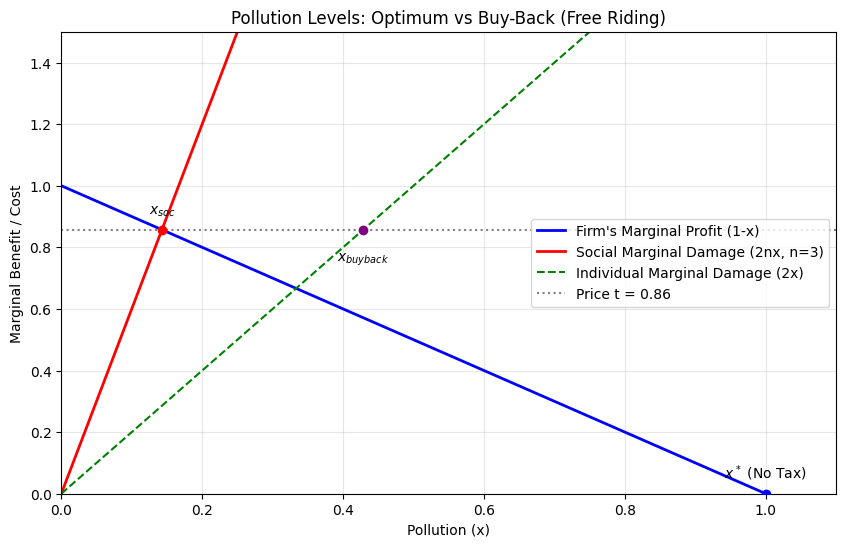

In [2]:
# Visualization for Q2
x = np.linspace(0, 1.1, 100)
n = 3  # Example number of villagers

# Curves
MP_firm = 1 - x                     # Marginal Profit (Benefit to firm of polluting)
MD_social = 2 * n * x               # Marginal Social Damage
MD_private = 2 * x                  # Private Marginal Damage (per villager)
tax_level = 2*n / (1 + 2*n)         # Pigouvian Tax / Price t

plt.figure(figsize=(10, 6))

# Plot Marginal Curves
plt.plot(x, MP_firm, label="Firm's Marginal Profit (1-x)", color='blue', linewidth=2)
plt.plot(x, MD_social, label=f"Social Marginal Damage (2nx, n={n})", color='red', linewidth=2)
plt.plot(x, MD_private, label="Individual Marginal Damage (2x)", color='green', linestyle='--')

# Add Price Line t
plt.axhline(y=tax_level, color='gray', linestyle=':', label=f'Price t = {tax_level:.2f}')

# Mark Points
x_star = 1.0
x_soc = 1 / (1 + 2*n)
x_buyback = tax_level / 2

plt.scatter([x_star], [0], color='blue', zorder=5)
plt.text(x_star, 0.05, '$x^*$ (No Tax)', ha='center')

plt.scatter([x_soc], [tax_level], color='red', zorder=5)
plt.text(x_soc, tax_level + 0.05, '$x_{soc}$', ha='center')

plt.scatter([x_buyback], [tax_level], color='purple', zorder=5)
plt.text(x_buyback, tax_level - 0.1, '$x_{buyback}$', ha='center')

plt.ylim(0, 1.5)
plt.xlim(0, 1.1)
plt.xlabel('Pollution (x)')
plt.ylabel('Marginal Benefit / Cost')
plt.title('Pollution Levels: Optimum vs Buy-Back (Free Riding)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()